In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('../Data/subredditdatacleaned.csv')

In [3]:
df.head(2)

,Unnamed: 0,title,selftext,subreddit,created_utc
0,0,Do the crazy customers realize that they becom...,removed_asdf_fix,0,1636729943
1,1,Store music volume controls,"My most recent job, and hopefully last, in ret...",0,1636729678


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df['subreddit'].value_counts(normalize=True)

1    0.501878
0    0.498122
Name: subreddit, dtype: float64

### Our baseline accuracy rate will be 50.18%, based of distribution above

In [6]:
df['all_words'] = df['title'] + df['selftext']

features = ['title', 'selftext'] 
X = df['all_words']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

y_train.value_counts()

1    1105
0    1091
Name: subreddit, dtype: int64

# Stopwords import/fix

In [7]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('removed_asdf_fix') # adding stop word

# Model 1 RF Pipe/GS CountVectorizer

In [8]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('model', RandomForestClassifier())
])

In [23]:
params = {
    'cvec__stop_words': ['english'],
    'cvec__min_df': [4],
    'cvec__max_df':[.6],
    'cvec__binary': [False],
    #'cvec__ngram_range': [(1,1), (1,2)], <- default best so commented out
    'model__n_estimators': [200],
    #'model__max_depth': [30, 40, 50] <- none seems to work better
    'model__min_samples_leaf': [1, 2],
    'model__min_samples_split': [10, 15] 
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8647432180575689


{'cvec__binary': False,
 'cvec__max_df': 0.6,
 'cvec__min_df': 4,
 'cvec__stop_words': 'english',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 10,
 'model__n_estimators': 200}

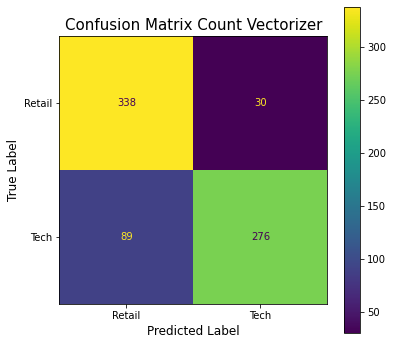

In [58]:
# inspiration https://stackoverflow.com/questions/61325314/how-to-change-plot-confusion-matrix-default-figure-size-in-sklearn-metrics-packa
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(gs, X_test, y_test, display_labels=['Retail', 'Tech'], ax=ax)
plt.title('Confusion Matrix Count Vectorizer', size=15)
plt.xlabel('Predicted Label', size=12)
plt.ylabel('True Label', size=12);
plt.savefig('../Visuals/rfmatrixcountVectorizer.png', bbox_inches='tight')

In [25]:
tn1, fp1, fn1, tp1 = 338, 30, 89, 276

### Accuracy

In [26]:
(tn1 + tp1) / (tn1 +tp1 + fp1 + fn1)

0.8376534788540245

### Specificity

In [27]:
tn1 / (tn1 + fp1)

0.9184782608695652

### Sensitivity

In [28]:
tp1 / (tp1 + fn1)

0.7561643835616438

### Precision

In [29]:
tp1 / (tp1 + fp1)

0.9019607843137255

# Model 2 Pipe/Gridsearch Tfid Vectorizer

In [31]:
pipe2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', RandomForestClassifier())
])

In [49]:
params2 = {
    'tfidf__stop_words': ['english'],
    'tfidf__min_df': [4],
    'tfidf__max_df':[.6],
    'tfidf__binary': [False],
    'tfidf__ngram_range': [(1,2)],
    #'model__n_estimators': [100, 200],
    #'model__max_depth': [None, 30, 40, 50] # <- none seems to work better
    #'model__min_samples_leaf': [1, 2, 3], default better
    'model__min_samples_split': [25, 30, 35] 
}
gs1 = GridSearchCV(pipe2, param_grid=params2)
gs1.fit(X_train, y_train)
print(gs1.best_score_)
gs1.best_params_

0.861557258231518


{'model__min_samples_split': 30,
 'tfidf__binary': False,
 'tfidf__max_df': 0.6,
 'tfidf__min_df': 4,
 'tfidf__ngram_range': (1, 2),
 'tfidf__stop_words': 'english'}

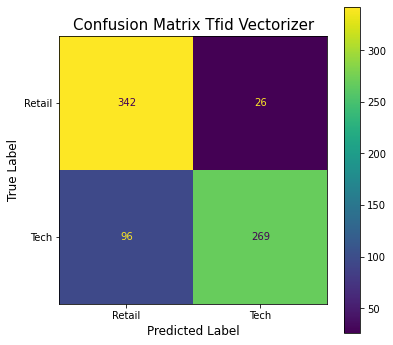

In [57]:
# inspiration https://stackoverflow.com/questions/61325314/how-to-change-plot-confusion-matrix-default-figure-size-in-sklearn-metrics-packa
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(gs1, X_test, y_test, display_labels=['Retail', 'Tech'], cmap='viridis', ax=ax)
plt.title('Confusion Matrix Tfid Vectorizer', size=15)
plt.xlabel('Predicted Label', size=12)
plt.ylabel('True Label', size=12);
plt.savefig('../Visuals/rfmatrixTfidVectorizer.png', bbox_inches='tight')

In [52]:
tn2, fp2, fn2, tp2 = 342, 26, 96, 269

### Accuracy

In [53]:
(tn2 + tp2) / (tn2 +tp2 + fp2 + fn2)

0.8335607094133697

### Specificity

In [54]:
tn2 / (tn2 + fp2)

0.9293478260869565

### Sensitivity

In [55]:
tp2 / (tp2 + fn2)

0.736986301369863

### Precision

In [56]:
tp2 / (tp2 + fp2)

0.911864406779661